In [ ]:
 import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Python Fundamentals

Question 1:

    Given a list of strings, return another array containing all of its longest strings.
  



    Example
    
    For list_of_strings = ['123','abc','ab','a'] the returned value should be ['123','abc']



    For this problem Time and Space Complexity will be taken into account. This can be solved in N time.
    

In [ ]:
def solution(inputArray):
    max_lenght = 0  # set counter

    #iterate through the array and check the lenght of each string
    for x in range(0,len(inputArray)):
        max_lenght = max(max_lenght,len(inputArray[x]))

    return [x for x in inputArray if len(x)==max_lenght]

In [ ]:
inputArray = ['123','abc','ab','a']
solution(inputArray)

['123', 'abc']

In [ ]:
#note to self work on python more

Question 2:

Ticket numbers consist of an even number of digits. A ticket number is considered lucky if the sum of the first half of the digits is equal to the sum of the second half.

Given a ticket number n, print True if it's lucky, false otherwise.

    For n = 1230, the output should be
    true;
    For n = 239017, the output should be
    false.

In [ ]:
def isLucky(n):
    n = [int(number) for number in str(n)]
    slice_n = len(n) // 2 #take the lenght of number in n and use floor division by half

    if sum(n[:slice_n]) == sum(n[slice_n : ]):
    #if the sum of n first half is equal to the second half
        return True
    else:
        return False
        #if not return false

In [ ]:
n = 239017
isLucky(n)

False

In [ ]:
n = 1230
isLucky(n)

True

# Pandas and Visualization Fundamentals

Question 1:

    Given the supplied DataFrame, Create a plot that displays the outliers of the sqft_living column.
    Then, create a dataframe that removes the rows that contain outliers.

    Clear labels and diagrams please.

In [ ]:
path = '/content/drive/MyDrive/data/career_class_data/kc_house_data.csv'

In [ ]:
df = pd.read_csv(path)

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline

Text(0.5, 1.0, 'Search for Square living outliers')

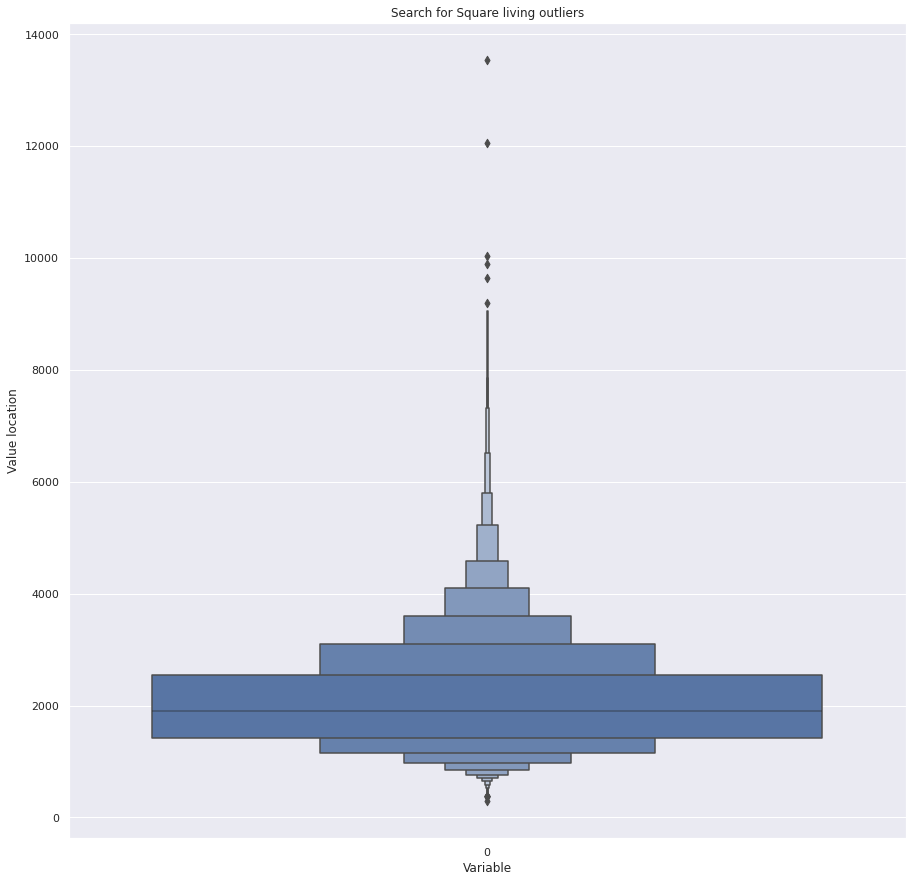

In [ ]:
sns.set(rc = {"figure.figsize": (15, 15)})
sns.boxenplot(data = df["sqft_living"])
plt.xlabel('Variable')
plt.ylabel('Value location')
plt.title('Search for Square living outliers')

In [ ]:
# looking at this boxen plot we have 2 dramatic outliers one located at 14000 and another at 12000
# But for conformation we with also do a scatter plot to confirm


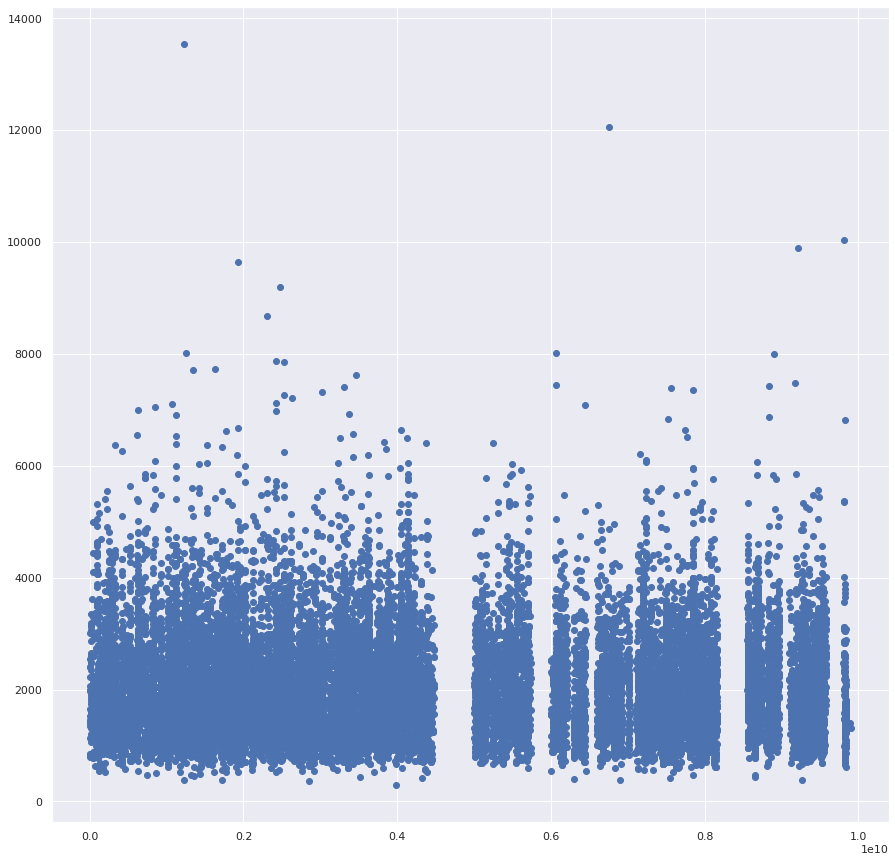

In [ ]:
x = df['id']
y = df['sqft_living']

plt.scatter(x, y)

In [ ]:
df['sqft_living']

0        1180
1        2570
2         770
3        1960
4        1680
         ... 
21608    1530
21609    2310
21610    1020
21611    1600
21612    1020
Name: sqft_living, Length: 21613, dtype: int64

In [ ]:
df1 = df[(df['sqft_living'] > 10000)]
df1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3914,9808700762,20140611T000000,7062500.0,5,4.5,10040,37325,2.0,1,2,...,11,7680.0,2360,1940,2001,98004,47.6500,-122.214,3930,25449
7252,6762700020,20141013T000000,7700000.0,6,8.0,12050,27600,2.5,0,3,...,13,8570.0,3480,1910,1987,98102,47.6298,-122.323,3940,8800
12777,1225069038,20140505T000000,2280000.0,7,8.0,13540,307752,3.0,0,4,...,12,9410.0,4130,1999,0,98053,47.6675,-121.986,4850,217800


In [ ]:
#since its only 3 rows I will drop by index
data_without_outliers = df[(df['sqft_living'] < 10000)]


Text(0.5, 1.0, 'Search for Square living outliers')

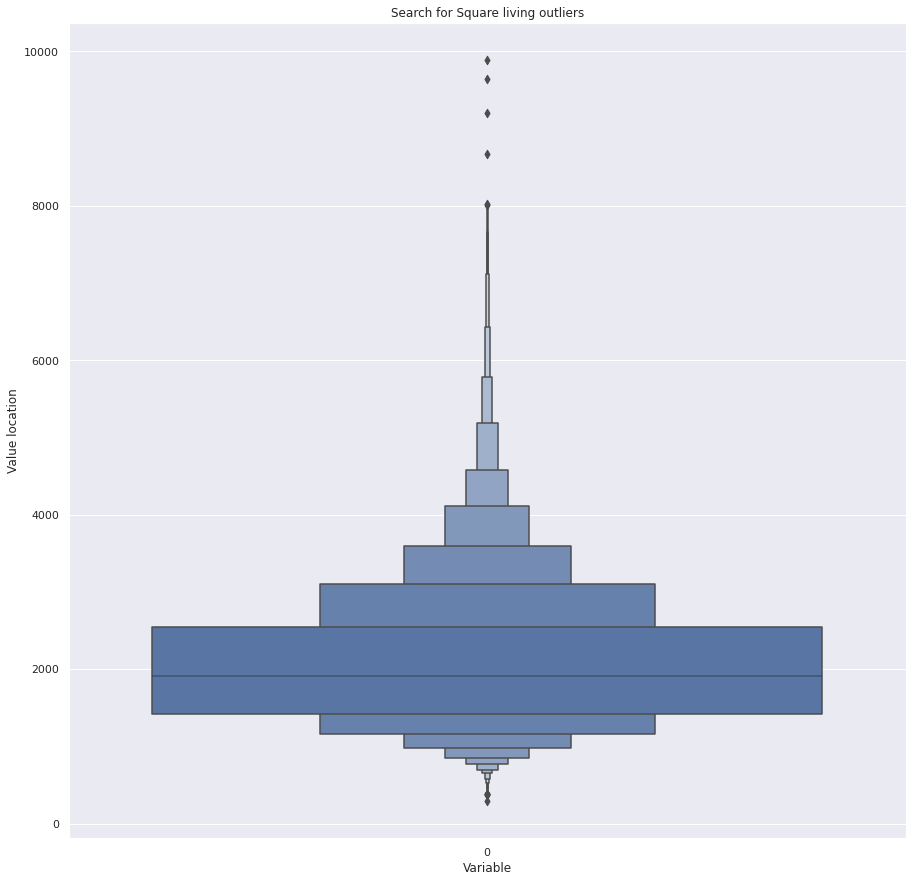

In [ ]:
sns.set(rc = {"figure.figsize": (15, 15)})
sns.boxenplot(data = data_without_outliers['sqft_living'])
plt.xlabel('Variable')
plt.ylabel('Value location')
plt.title('Search for Square living outliers')

Question 2:

    Create a sub-dataframe with the following constraints.

    It should only contain the following columns sqft_living,bathroom,grade,and bedrooms.

    It should only contain rows that contain 2-3 bathrooms, and 3-4 bedrooms.

In [ ]:
sub_data = df[['sqft_living','bathrooms','grade','bedrooms']]
sub_data

,sqft_living,bathrooms,grade,bedrooms
0,1180,1.00,7,3
1,2570,2.25,7,3
2,770,1.00,6,2
3,1960,3.00,7,4
4,1680,2.00,8,3
...,...,...,...,...
21608,1530,2.50,8,3
21609,2310,2.50,8,4
21610,1020,0.75,7,2
21611,1600,2.50,8,3


In [ ]:
sub_data['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 0.  , 1.25, 5.25, 6.  , 0.5 ,
       5.5 , 6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [ ]:
sub_data['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33])

In [ ]:
filterinfDataframe = sub_data[(sub_data['bedrooms'] == 3 ) & (sub_data['bathrooms'] == 2 ) ]
filterinfDataframe

,sqft_living,bathrooms,grade,bedrooms
4,1680,2.0,8,3
16,1890,2.0,7,3
25,1710,2.0,6,3
71,1260,2.0,7,3
101,1980,2.0,7,3
...,...,...,...,...
21438,1980,2.0,8,3
21442,1870,2.0,8,3
21531,1060,2.0,7,3
21550,1260,2.0,7,3


# Machine Learning Fundamentals

Question 1:

    With Y as our output feature, which columns would be appropriate to use as our X Input features for Linear Regression?
    Justify your reasoning for the features, and include diagrams as well as writeups.

Question 2:

Create a model that performs Linear Regression on the Dataset.

Expecatations.


    Cross-Validatation. Ensure you build a Test Train Split.

    Feature Scaling(if necessary). Ensure you scale your features of your input features if needed. Justify your changes.

    Handling of Nulls and NaNs. If there are nulls or NaNs, please correct them and give reasoning as to your changes.

    Comments and Segementation. A non technical person should be able to work through your notebook and understand the results, and the analysis. Include high quality comments as well as visualizations.

    Score your results using Score, RMSE, RMAE. Ensure that you have an appropriate score.

    Give insight as to which features impacted the model the most, as well as future features that you believe would help your model perform better.
    



In [ ]:
#creating a data frame for test and train
raw= pd.read_csv('/content/drive/MyDrive/data/career_class_data/kc_house_data.csv')

df_test = pd.read_csv('/content/drive/MyDrive/data/career_class_data/kc_house_data.csv')

In [ ]:
#quick eda on data

In [ ]:
df_test.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
#check shape of data
df_test.shape

(21613, 21)

In [ ]:
#checking to see if there is any null values
df_test.isnull().sum()


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
#there are only 2 null values in square_above because of this it not wise to drop
from sklearn.impute import SimpleImputer

In [ ]:
filler = ["sqft_above"]
imputer = SimpleImputer()

In [ ]:
imputer.fit(raw[filler])

SimpleImputer()

In [ ]:
#make placeholder for null value in  column

df_test[filler] = imputer.fit_transform(df_test[filler])

In [ ]:
df_test.isnull().sum()


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
#As you can see now there is no null values our data

In [ ]:
#checking the correlation of each column compared to price
df_test.corr()['price']

id              -0.016762
price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605565
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64

In [ ]:
#do as a copy to make a sub data frame not tied to the original
#safety reasons
test_dataframe = df_test[['price', 'waterfront', 'bathrooms','sqft_above', 'floors', 'view','condition']].copy()

In [ ]:
test_dataframe

,price,waterfront,bathrooms,sqft_above,floors,view,condition
0,221900.0,0,1.00,1180.0,1.0,0,3
1,538000.0,0,2.25,2170.0,2.0,0,3
2,180000.0,0,1.00,770.0,1.0,0,3
3,604000.0,0,3.00,1050.0,1.0,0,5
4,510000.0,0,2.00,1680.0,1.0,0,3
...,...,...,...,...,...,...,...
21608,360000.0,0,2.50,1530.0,3.0,0,3
21609,400000.0,0,2.50,2310.0,2.0,0,3
21610,402101.0,0,0.75,1020.0,2.0,0,3
21611,400000.0,0,2.50,1600.0,2.0,0,3


In [ ]:
import seaborn as sns

Text(0.5, 1.0, 'Distribution check')

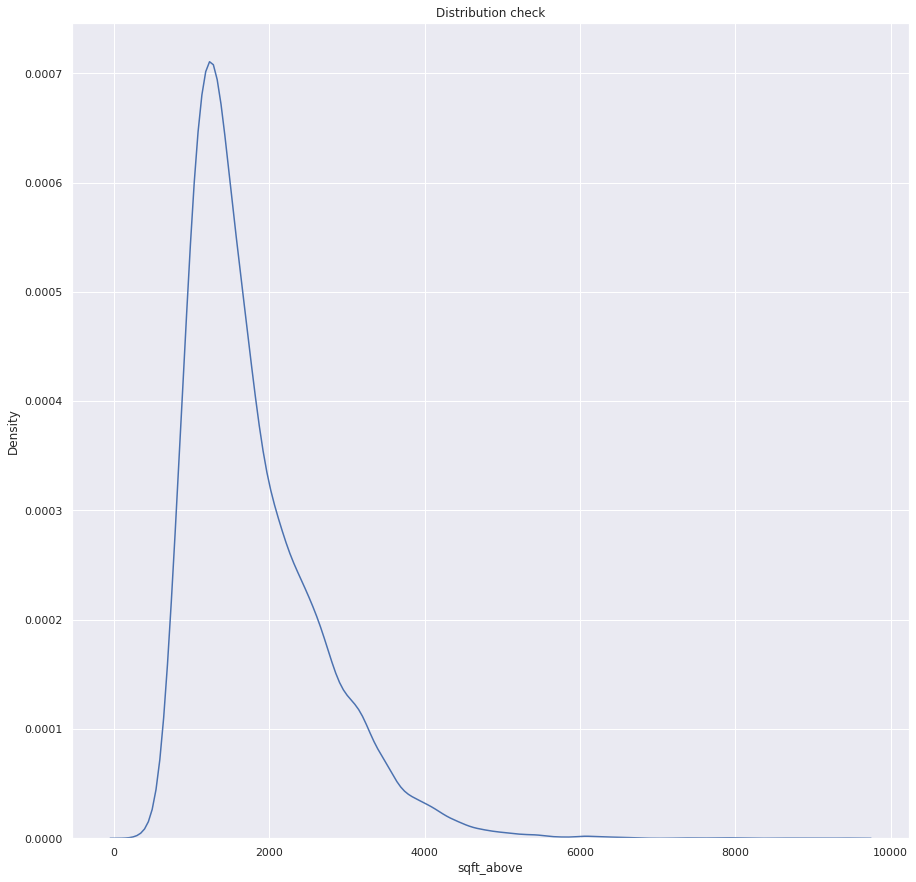

In [ ]:
sns.kdeplot(data= test_dataframe['sqft_above'])

plt.title('Distribution check')
#right Sewed

In [ ]:
#do not want extreme outliers & non normal distributions
#best way to fix is log transformation
import numpy as np

Text(0.5, 1.0, 'Distribution check')

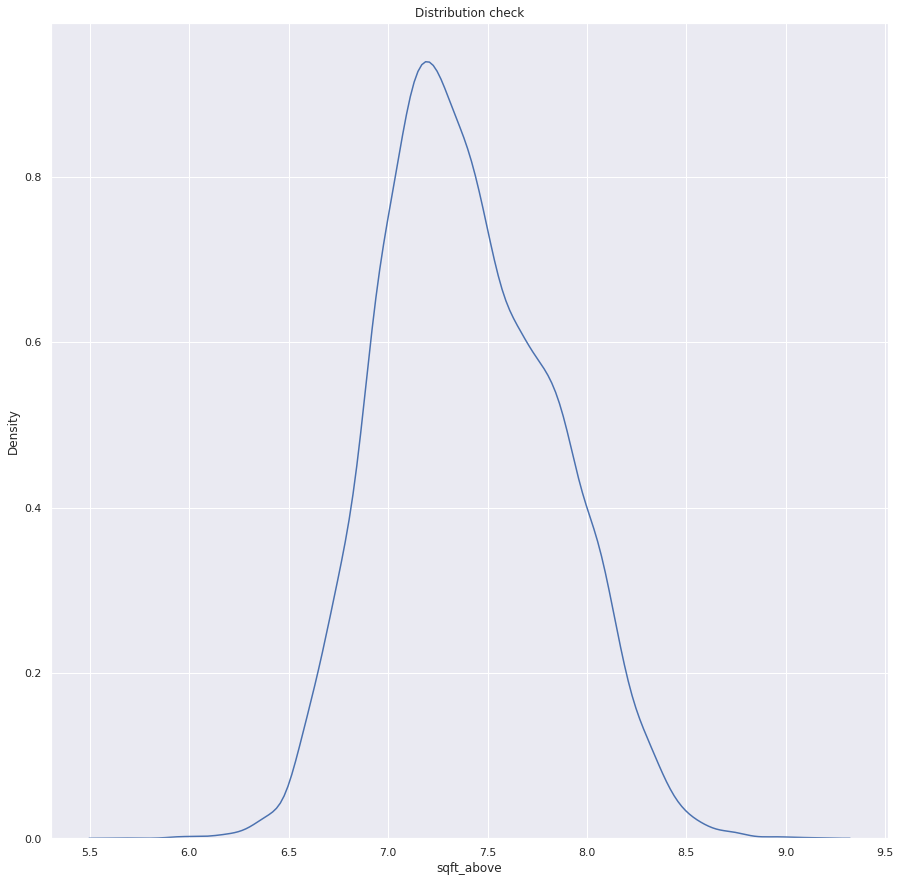

In [ ]:
sns.kdeplot(data=np.log(test_dataframe['sqft_above']))
plt.title('Distribution check')

#doing log transformation

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
test_dataframe['sqft_above'] = np.log(test_dataframe['sqft_above'])
test_dataframe

,price,waterfront,bathrooms,sqft_above,floors,view,condition
0,221900.0,0,1.00,7.073270,1.0,0,3
1,538000.0,0,2.25,7.682482,2.0,0,3
2,180000.0,0,1.00,6.646391,1.0,0,3
3,604000.0,0,3.00,6.956545,1.0,0,5
4,510000.0,0,2.00,7.426549,1.0,0,3
...,...,...,...,...,...,...,...
21608,360000.0,0,2.50,7.333023,3.0,0,3
21609,400000.0,0,2.50,7.745003,2.0,0,3
21610,402101.0,0,0.75,6.927558,2.0,0,3
21611,400000.0,0,2.50,7.377759,2.0,0,3


In [ ]:
x = test_dataframe[['waterfront', 'bathrooms','sqft_above', 'floors', 'view','condition']].values
y = test_dataframe['price'].values


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=35)


In [ ]:
# import Linear Regression testing
from sklearn.linear_model import LinearRegression
from sklearn.exceptions import NotFittedError


In [ ]:
lr = LinearRegression()


In [ ]:
LinearRegression().fit(x_train, x_test, y_train, y_test)

TypeError: ignored

In [ ]:
predict_lr = lr.predict(x_test)
score_lr = lr.score(x_train,y_train)
print(score_lr)

NotFittedError: ignored

In [ ]:
#Score was alittle on the low side it could be because our random state number or columns choose

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
from math import sqrt

In [ ]:
#testing for mean absolute error
mae_lr = mean_absolute_error(y_test,predict_lr)
print(mae_lr)

In [ ]:
reg = LinearRegression().fit(test_dataframe.drop('price', axis=1), test_dataframe['price'])

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
#give mean square error
mse_lr = mean_squared_error(y_test,predict_lr)
print(mse_lr)

 code above worked previously but after I restarted my runtime I recieved an error last min

"Call 'fit' with appropriate arguments before using this estimator"


which is why the code below is rushed.


# Do Over

Give insight as to which features impacted the model the most, as well as future features that you believe would help your model perform better.


In [ ]:
#Due to the score given fI would select mean square error over mean absolute

In [ ]:
reg = LinearRegression().fit(test_dataframe.drop('price', axis=1), test_dataframe['price'])

In [ ]:
reg.score(test_dataframe.drop('price', axis=1), test_dataframe['price'])

0.4509995541846463

In [ ]:
y_pred = reg.predict(test_dataframe.drop('price', axis=1))

In [ ]:
y_pred

array([267683.81015831, 573876.89417675, 135618.05078849, ...,
       152599.2615027 , 510890.1855714 , 152599.2615027 ])

In [ ]:
mean_absolute_error(test_dataframe['price'],y_pred)

181124.74937430586

In [ ]:
mean_squared_error(test_dataframe['price'],y_pred)

73992162167.11285